# Описание данных

## Таблица `Users`

| Поле              | Описание                                       |
|-------------------|------------------------------------------------|
| `user_id`         | Уникальный идентификатор пользователя.         |
| `registration_date` | Дата регистрации пользователя.                |
| `age`             | Возраст пользователя.                          |
| `gender`          | Пол.                                |
| `region`          | Регион.                                        |
| `acq_channel`     | Канал привлечения.                             |
| `buyer_segment`   | Сегмент покупателя.                            |
| `cohort_week`     | Неделя привлечения.|
| `cohort_month`    | Месяц привлечения. |

---

## Таблица `Events`

| Поле          | Описание                                                                 |
|---------------|--------------------------------------------------------------------------|
| `event_id`    | Уникальный идентификатор события.                                        |
| `user_id`     | Идентификатор пользователя.                                              |
| `event_date`  | Дата события.                                                            |
| `event_type`  | Тип события.   |
| `os`          | Операционная система.               |
| `device`      | Тип устройства.                                |
| `product_name`| Наименование товара, к которому относится событие (если применимо).      |
| `event_week`  | Неделя события.                                          |
| `event_month` | Месяц события .                                           |

---

## Таблица `Orders`

| Поле          | Описание                                                                 |
|---------------|--------------------------------------------------------------------------|
| `order_id`    | Уникальный идентификатор заказа.                                         |
| `user_id`     | Идентификатор пользователя, который сделал заказ |
| `order_date`  | Дата и время оформления заказа.                                          |
| `product_name`| Наименование товара.                                                     |
| `quantity`    | Количество единиц товара в заказе.                                       |
| `unit_price`  | Цена за одну единицу товара.                                             |
| `total_price` | Итоговая сумма заказа.                                                   |
| `category_name` | Наименование категории товара.                                         |
| `order_week`  | Неделя заказа.                                           |
| `order_month` | Месяц заказа.                                            |


## Таблица `Campaign_costs`

| Поле         | Описание                                                                 |
|--------------|--------------------------------------------------------------------------|
| `acq_channel`| Канал привлечения.  |
| `spend_month`| Месяц, в который был потрачен бюджет (отражает период, в котором были привлечены пользователи)                      |
| `budget`     | Маркетинговый бюджет (в денежном выражении), потраченный на данный канал в указанном месяце.                           |



## Описание событий

| Событие             | Описание                                                                                  |
|---------------------|-------------------------------------------------------------------------------------------|
| `page_view`         | Открытие любой страницы сайта или приложения пользователем.                                |
| `product_view`      | Просмотр страницы конкретного товара.                                                     |
| `product_click`     | Клик по товару (например, из списка товаров или на баннере).                              |
| `add_to_cart`       | Добавление товара в корзину.                                                              |
| `remove_from_cart`  | Удаление товара из корзины.                                                               |
| `search`            | Выполнение поиска по сайту или приложению.                                                |
| `filter_apply`      | Применение фильтра (например, по цене, бренду, категории).                                |
| `checkout_start`    | Начало оформления заказа (переход к оформлению корзины).                                  |
| `checkout_complete` | Завершение оформления заказа (не гарантирует покупку, покупка зависит от факта оплаты).                                          |
| `user_login`        | Вход пользователя в личный кабинет или аккаунт.                                           |
| `user_logout`       | Выход пользователя из аккаунта.                                                           |
| `wishlist_add`      | Добавление товара в список желаемого (wishlist).                                          |
| `category_view`     | Просмотр страницы категории товаров.                                                      |
| `banner_click`      | Клик по рекламному баннеру на сайте или в приложении.                                     |
| `promo_view`        | Просмотр промо-акции или специального предложения.                                        |


## Выручка маркетплейса = 5% от total_price

# Блок кода и расчета метрик

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

In [3]:
# URL-адреса для загрузки данных
url_orders = ...
url_campaign_costs = ...
url_users = ...
url_events = ...

# Локальные пути для сохранения файлов
local_orders = 'datasets/pa_marketplace_orders.csv'
local_campaign_costs = 'datasets/pa_marketplace_campaign_costs.csv'
local_users = 'datasets/pa_marketplace_users.csv'
local_events = 'datasets/pa_marketplace_events.csv'

In [4]:
try:
    orders = pd.read_csv( local_orders)
    print("Orders: Loaded from local")
except Exception as e:
    print("Orders: Failed to load from local:", e)
    try:
        orders = pd.read_csv(url_orders)
        print("Orders: Loaded from url")
    except Exception as e:
        print("Orders: Failed to load local file either:", e)

# Campaign Costs
try:
    campaign_costs = pd.read_csv(local_campaign_costs)
    print("Campaign Costs: Loaded from local")
except Exception as e:
    print("Campaign Costs: Failed to load from local:", e)
    try:
        campaign_costs = pd.read_csv(url_campaign_costs)
        print("Campaign Costs: Loaded from url")
    except Exception as e:
        print("Campaign Costs: Failed to load local file either:", e)

# Users
try:
    users = pd.read_csv(local_users)
    print("Users: Loaded from local")
except Exception as e:
    print("Users: Failed to load from local:", e)
    try:
        users = pd.read_csv(url_users)
        print("Users: Loaded from url")
    except Exception as e:
        print("Users: Failed to load local file either:", e)

# Events
try:
    events = pd.read_csv(local_events)
    print("Events: Loaded from local")
except Exception as e:
    print("Events: Failed to load from local:", e)
    try:
        events = pd.read_csv(url_events)
        print("Events: Loaded from url")
    except Exception as e:
        print("Events: Failed to load local file either:", e)

Orders: Failed to load from local: [Errno 2] No such file or directory: 'datasets/pa_marketplace_orders.csv'
Orders: Loaded from url
Campaign Costs: Failed to load from local: [Errno 2] No such file or directory: 'datasets/pa_marketplace_campaign_costs.csv'
Campaign Costs: Loaded from url
Users: Failed to load from local: [Errno 2] No such file or directory: 'datasets/pa_marketplace_users.csv'
Users: Loaded from url
Events: Failed to load from local: [Errno 2] No such file or directory: 'datasets/pa_marketplace_events.csv'
Events: Loaded from url


In [5]:
def data_diging(df):
    for name, t in df.items():
        print(f"\n\nТаблица: {name},  Размер: {t.shape[0]} строк, {t.shape[1]} столбцов")

        cnt_values = t.notna().sum().reset_index(name='non_null_count')
        dtype_values = t.dtypes.reset_index(name='type')
        missing_values = t.isna().mean().reset_index(name='missing_val')
        unique_values = t.nunique().reset_index(name='unique_count')
    
        df_merge = (
            dtype_values
            .merge(unique_values, on='index')
            .merge(cnt_values, on='index')
            .merge(missing_values, on='index')
            .rename(columns={'index': 'column'})
            .reset_index(drop=True)
        )

        df_merge['missing_val'] = (df_merge['missing_val'] * 100).round(2).astype(str) + '%'

        display(df_merge) 

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31357 entries, 0 to 31356
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       31357 non-null  int64  
 1   user_id        31357 non-null  int64  
 2   order_date     31357 non-null  object 
 3   product_name   31357 non-null  object 
 4   quantity       31357 non-null  int64  
 5   unit_price     31357 non-null  float64
 6   total_price    31357 non-null  float64
 7   category_name  31357 non-null  object 
 8   order_week     31357 non-null  object 
 9   order_month    31357 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 2.4+ MB


In [7]:
campaign_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   88 non-null     int64  
 1   acq_channel  88 non-null     object 
 2   spend_month  88 non-null     object 
 3   budget       88 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44151 entries, 0 to 44150
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            44151 non-null  int64 
 1   registration_date  44151 non-null  object
 2   age                44151 non-null  int64 
 3   gender             44151 non-null  object
 4   region             44151 non-null  object
 5   acq_channel        44151 non-null  object
 6   buyer_segment      44151 non-null  object
 7   cohort_week        44151 non-null  object
 8   cohort_month       44151 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.0+ MB


In [9]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785859 entries, 0 to 785858
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   event_id      785859 non-null  int64 
 1   user_id       785859 non-null  int64 
 2   event_date    785859 non-null  object
 3   event_type    785859 non-null  object
 4   os            785859 non-null  object
 5   device        785859 non-null  object
 6   product_name  385740 non-null  object
 7   event_week    785859 non-null  object
 8   event_month   785859 non-null  object
dtypes: int64(2), object(7)
memory usage: 54.0+ MB


In [10]:
data_diging({'Orders':orders,'Campaign ':campaign_costs ,'Users':users,'Events':events})



Таблица: Orders,  Размер: 31357 строк, 10 столбцов


,column,type,unique_count,non_null_count,missing_val
0,order_id,int64,31357,31357,0.0%
1,user_id,int64,8922,31357,0.0%
2,order_date,object,18009,31357,0.0%
3,product_name,object,200,31357,0.0%
4,quantity,int64,3,31357,0.0%
5,unit_price,float64,200,31357,0.0%
6,total_price,float64,600,31357,0.0%
7,category_name,object,25,31357,0.0%
8,order_week,object,53,31357,0.0%
9,order_month,object,12,31357,0.0%




Таблица: Campaign ,  Размер: 88 строк, 4 столбцов


,column,type,unique_count,non_null_count,missing_val
0,Unnamed: 0,int64,88,88,0.0%
1,acq_channel,object,7,88,0.0%
2,spend_month,object,13,88,0.0%
3,budget,float64,88,88,0.0%




Таблица: Users,  Размер: 44151 строк, 9 столбцов


,column,type,unique_count,non_null_count,missing_val
0,user_id,int64,44151,44151,0.0%
1,registration_date,object,42318,44151,0.0%
2,age,int64,53,44151,0.0%
3,gender,object,2,44151,0.0%
4,region,object,9,44151,0.0%
5,acq_channel,object,6,44151,0.0%
6,buyer_segment,object,4,44151,0.0%
7,cohort_week,object,53,44151,0.0%
8,cohort_month,object,12,44151,0.0%




Таблица: Events,  Размер: 785859 строк, 9 столбцов


,column,type,unique_count,non_null_count,missing_val
0,event_id,int64,785859,785859,0.0%
1,user_id,int64,22138,785859,0.0%
2,event_date,object,366,785859,0.0%
3,event_type,object,15,785859,0.0%
4,os,object,4,785859,0.0%
5,device,object,3,785859,0.0%
6,product_name,object,200,385740,50.91%
7,event_week,object,53,785859,0.0%
8,event_month,object,12,785859,0.0%


In [11]:
events['day_number'] = pd.to_datetime(events['event_date']).dt.dayofyear 
events['week_number'] = pd.to_datetime(events['event_date']).dt.dayofyear // 7 + 1
events['month_number'] = pd.to_datetime(events['event_month']).dt.month

orders['order_date']= pd.to_datetime(orders['order_date'])
orders['day_number'] = pd.to_datetime(orders['order_date']).dt.dayofyear 
orders['week_number'] = pd.to_datetime(orders['order_date']).dt.dayofyear // 7 + 1
orders['month_number'] = pd.to_datetime(orders['order_date']).dt.month

events['event_date']=pd.to_datetime(events['event_date'])
events['event_week']=pd.to_datetime(events['event_week'])
events['event_month']=pd.to_datetime(events['event_month'])

users['cohort_week']=pd.to_datetime(users['cohort_week'])
users['cohort_month']=pd.to_datetime(users['cohort_month'])
users['registration_date']=pd.to_datetime(users['registration_date'])

campaign_costs['spend_month']=  pd.to_datetime(campaign_costs['spend_month']).dt.to_period('M')

In [12]:
categorical_columns = {
    'orders': [ 'category_name'],
    'campaign_costs': ['acq_channel'],
    'users': ['gender', 'region', 'acq_channel', 'buyer_segment',],
    'events': ['event_type', 'os', 'device', 'week_number', 'month_number']}

tables = {
    'orders': orders,
    'campaign_costs': campaign_costs,
    'users': users,
    'events': events}

for table_name, df in tables.items():
    for col in categorical_columns[table_name]:
        if col in df.columns:
            df[col] = df[col].astype('category')

In [13]:
orders['revenu']=orders['total_price']*0.05

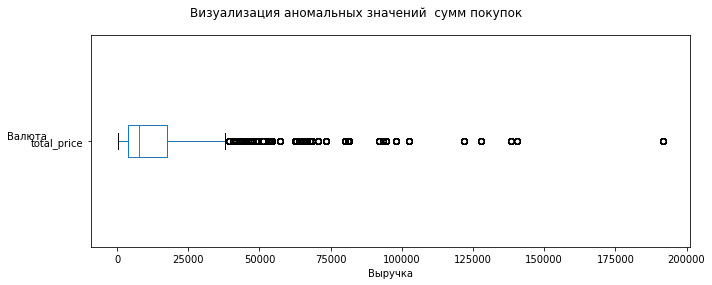

In [14]:
orders.boxplot(column='total_price', vert=False, figsize=(10, 4))
plt.suptitle('Визуализация аномальных значений  сумм покупок')
plt.title('')
plt.xlabel('Выручка')
plt.ylabel('Валюта', rotation=0)
plt.grid()
# plt.xscale('log')
plt.tight_layout()
plt.show()

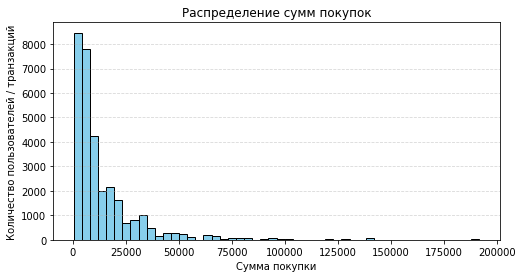

In [15]:
plt.figure(figsize=(8,4))
plt.hist(orders['total_price'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Сумма покупки')
plt.ylabel('Количество пользователей / транзакций')
plt.title('Распределение сумм покупок')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [16]:
quantile_99 = orders['total_price'].quantile(0.99)

orders=orders[orders['total_price']<quantile_99].copy()

In [17]:
 orders[['user_id', 'order_date', 'product_name', 'total_price']].duplicated().sum()

269

In [18]:
orders[orders[['user_id', 'order_date', 'product_name', 'total_price']].duplicated(keep=False)]

,order_id,user_id,order_date,product_name,quantity,unit_price,total_price,category_name,order_week,order_month,day_number,week_number,month_number,revenu
232,233,203,2024-02-07 22:19:44,Тетрадь общая,1,2829.81,2829.81,Книги и канцтовары,2024-02-05,2024-02-01,38,6,2,141.4905
233,234,203,2024-02-07 22:19:44,Тетрадь общая,1,2829.81,2829.81,Книги и канцтовары,2024-02-05,2024-02-01,38,6,2,141.4905
459,460,362,2024-01-26 02:59:13,Свечи зажигания,3,7696.64,23089.92,Автотовары,2024-01-22,2024-01-01,26,4,1,1154.4960
460,461,362,2024-01-26 02:59:13,Свечи зажигания,3,7696.64,23089.92,Автотовары,2024-01-22,2024-01-01,26,4,1,1154.4960
562,563,420,2024-01-13 19:39:50,Чайник электрический,3,6254.47,18763.41,Товары для кухни,2024-01-08,2024-01-01,13,2,1,938.1705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30863,31095,41025,2024-12-07 21:50:56,Бинт эластичный,1,1152.21,1152.21,Медицинские товары,2024-12-02,2024-12-01,342,49,12,57.6105
31092,31368,42209,2024-12-12 08:18:11,Подушки декоративные,1,6717.61,6717.61,Декор и освещение,2024-12-09,2024-12-01,347,50,12,335.8805
31093,31369,42209,2024-12-12 08:18:11,Подушки декоративные,1,6717.61,6717.61,Декор и освещение,2024-12-09,2024-12-01,347,50,12,335.8805
31253,31572,43300,2024-12-31 07:53:21,Рубашка классическая,3,2356.25,7068.75,Мужская одежда,2024-12-30,2024-12-01,366,53,12,353.4375


In [19]:
orders = orders.drop_duplicates(subset=['user_id', 'order_date', 'product_name', 'total_price'])

### 2. Построить обзор ключевых метрик

На этом этапе вам нужно выполнить верхнеуровневую оценку состояния продукта с помощью собранных витрин. Бизнес просит просто оценить текущее состояние — без глубокой сегментации и оценки сложных метрик.

Выручка бизнеса — 5% комиссии от стоимости любой продажи.

Посмотрите на общую динамику ключевых метрик: например, Revenue, ARPU или ARPPU, MAU, WAU, DAU, AOV, Retention, CTR, CR в заказ. Следовать этому списку необязательно, исходите из данных.

Ваша цель — быстро получить целостную картину, не применяя сегментацию и не рассматривая глубокие срезы. Определите, соответствует ли продукт базовым ожиданиям, виден ли рост, есть ли тревожные сигналы.

Результатом задания будет ваш вывод о динамике основных продуктовых метрик.

In [20]:
WAU=events.groupby('week_number',observed=True)['user_id'].nunique()
MAU=events.groupby('month_number',observed=True)['user_id'].nunique()
DAU=events.groupby(['month_number','day_number'],observed=True)['user_id'].nunique()

unique_events_by_day=events.groupby('day_number',observed=True)['event_id'].nunique()
unique_events_by_month=events.groupby('month_number',observed=True)['event_id'].nunique()
unique_events_by_week=events.groupby('week_number',observed=True)['event_id'].nunique()

unique_orders_by_day=orders.groupby(['month_number','day_number'],observed=True)['order_id'].nunique()
unique_orders_by_month=orders.groupby('month_number',observed=True)['order_id'].nunique()
unique_orders_by_week=orders.groupby('week_number',observed=True)['order_id'].nunique()

In [21]:
orders

,order_id,user_id,order_date,product_name,quantity,unit_price,total_price,category_name,order_week,order_month,day_number,week_number,month_number,revenu
0,1,3,2024-01-19 01:52:52,Шуруповерт,2,5539.13,11078.26,Инструменты и садовый инвентарь,2024-01-15,2024-01-01,19,3,1,553.9130
1,2,3,2024-01-19 01:52:52,Молоток слесарный,1,11340.38,11340.38,Инструменты и садовый инвентарь,2024-01-15,2024-01-01,19,3,1,567.0190
2,3,3,2024-01-19 01:52:52,Секатор садовый,2,10892.09,21784.18,Инструменты и садовый инвентарь,2024-01-15,2024-01-01,19,3,1,1089.2090
3,4,3,2024-01-25 13:59:38,Шуруповерт,2,5539.13,11078.26,Инструменты и садовый инвентарь,2024-01-22,2024-01-01,25,4,1,553.9130
4,5,3,2024-01-25 13:59:38,Чай черный,1,2099.59,2099.59,Продукты питания,2024-01-22,2024-01-01,25,4,1,104.9795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31352,31774,44719,2024-12-30 02:21:00,Дезодорант,2,697.72,1395.44,Средства для ухода,2024-12-30,2024-12-01,365,53,12,69.7720
31353,31775,44719,2024-12-30 02:21:00,Поло Ralph Lauren,2,5446.69,10893.38,Мужская одежда,2024-12-30,2024-12-01,365,53,12,544.6690
31354,31776,44777,2024-12-30 17:45:00,Футболка дышащая,1,3114.57,3114.57,Одежда для спорта,2024-12-30,2024-12-01,365,53,12,155.7285
31355,31777,44777,2024-12-30 17:45:00,Костюм спортивный,2,6999.82,13999.64,Одежда для спорта,2024-12-30,2024-12-01,365,53,12,699.9820


In [22]:
avg_DAU_events = DAU.groupby('month_number',observed=True).mean()
stickiness_events= avg_DAU_events/MAU*100

avg_DAU_orders = unique_orders_by_day.groupby('month_number',observed=True).mean()
stickiness_orders= avg_DAU_orders/unique_orders_by_month*100

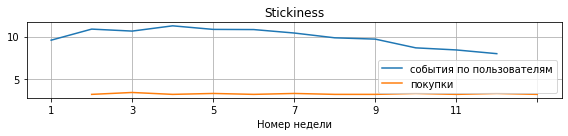

In [23]:
plt.figure(figsize=(8, 2))
stickiness_events.plot(kind='line')
stickiness_orders.plot(kind='line')
plt.legend(['события по пользователям','покупки'])
plt.title('Stickiness')
plt.xlabel('Номер недели')
plt.grid(True)
plt.tight_layout()
plt.show()

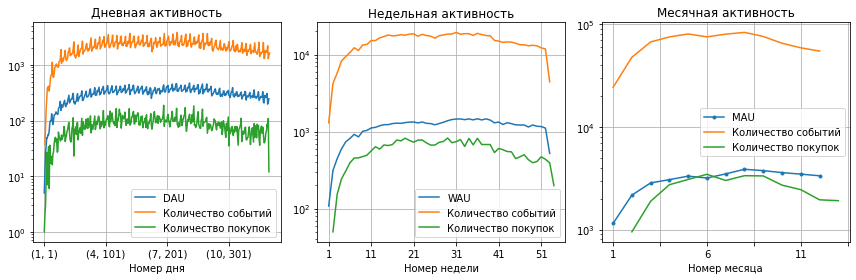

In [24]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 2)
WAU.plot(kind='line')
unique_events_by_week.plot(kind='line')
unique_orders_by_week.plot(kind='line')
plt.legend(['WAU','Количество событий', 'Количество покупок'])
plt.title('Недельная активность')
plt.xlabel('Номер недели')
plt.yscale('log')
plt.grid(True)

plt.subplot(1, 3, 3)
MAU.plot(kind='line', marker='.')
unique_events_by_month.plot(kind='line' )
unique_orders_by_month.plot(kind='line')
plt.legend(['MAU','Количество событий', 'Количество покупок'])
plt.title('Месячная активность')
plt.xlabel('Номер месяца')
plt.yscale('log')
plt.grid(True)

plt.subplot(1, 3, 1)
DAU.plot(kind='line')
unique_events_by_day.plot(kind='line')
unique_orders_by_day.plot(kind='line')
plt.legend(['DAU','Количество событий', 'Количество покупок'])
plt.title('Дневная активность')
plt.xlabel('Номер дня')
plt.yscale('log')
plt.grid(True)

plt.tight_layout()
plt.show()

In [25]:
orders_with_users=orders.merge(users,on='user_id', how='left')

In [26]:
data_diging({'orders_with_users':orders_with_users})



Таблица: orders_with_users,  Размер: 30768 строк, 22 столбцов


,column,type,unique_count,non_null_count,missing_val
0,order_id,int64,30768,30768,0.0%
1,user_id,int64,8890,30768,0.0%
2,order_date,datetime64[ns],17904,30768,0.0%
3,product_name,object,200,30768,0.0%
4,quantity,int64,3,30768,0.0%
5,unit_price,float64,200,30768,0.0%
6,total_price,float64,592,30768,0.0%
7,category_name,category,25,30768,0.0%
8,order_week,object,53,30768,0.0%
9,order_month,object,12,30768,0.0%


<div class="alert alert-info"> 2.89% пользователй купили, но не регистрировались(если такая возможность есть), или были зарегистрированны ранее(скорее всего).


 Анализ по gender


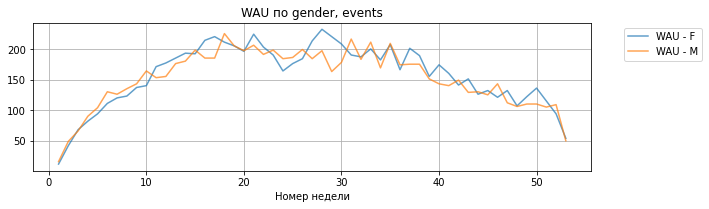

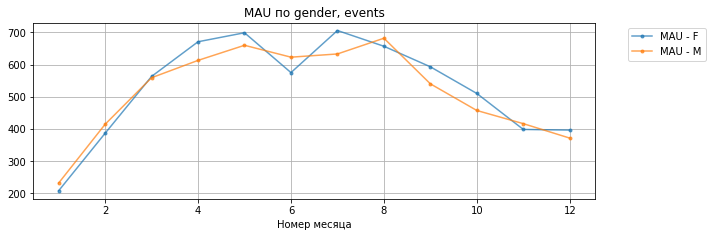

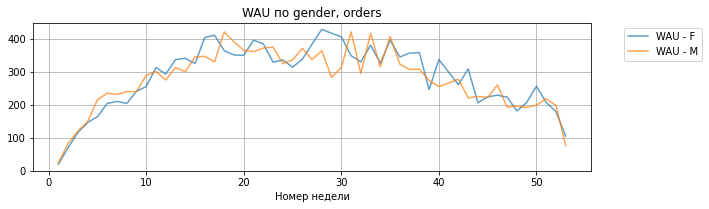

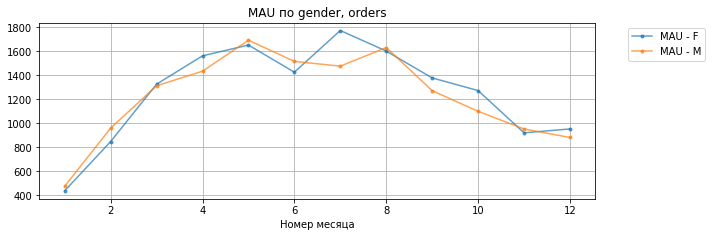


 Анализ по region


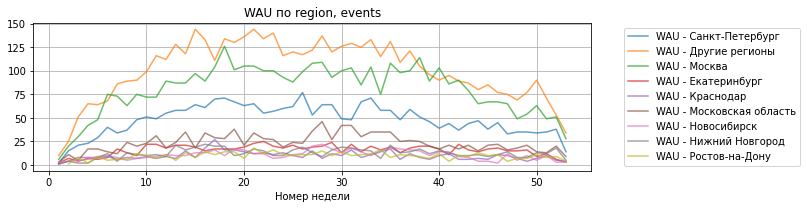

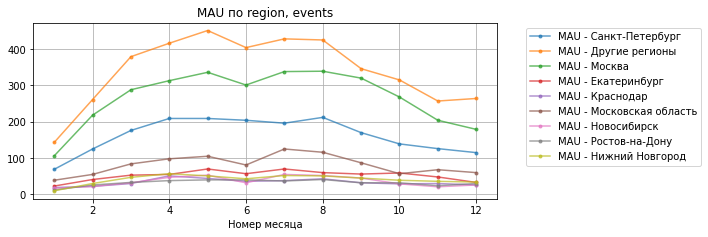

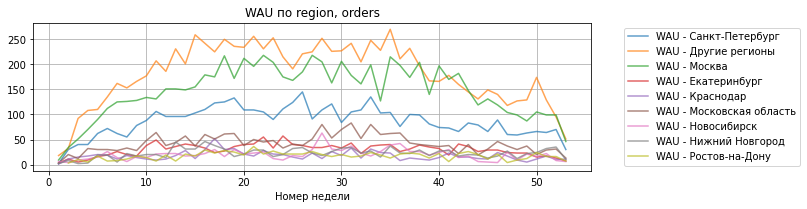

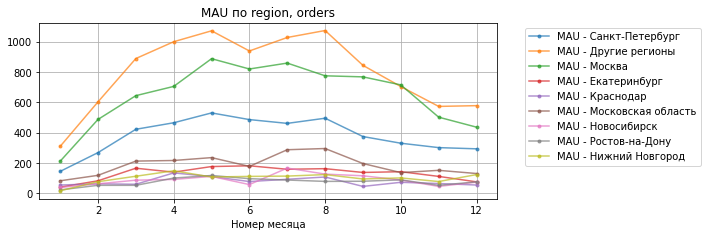


 Анализ по acq_channel


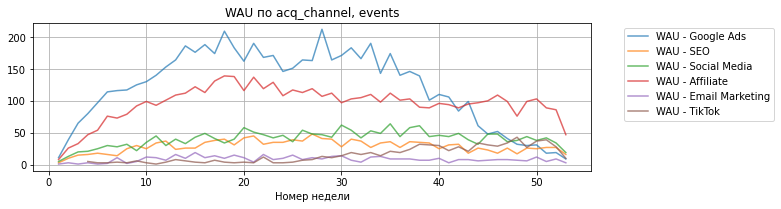

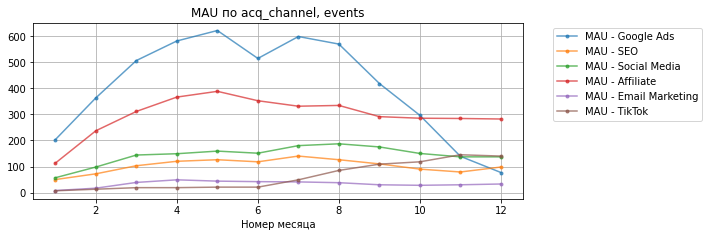

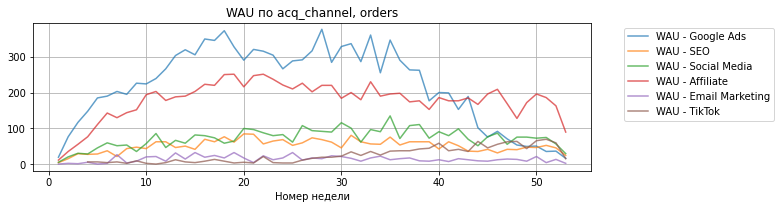

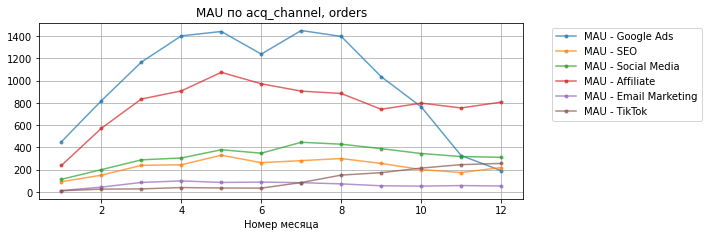


 Анализ по buyer_segment


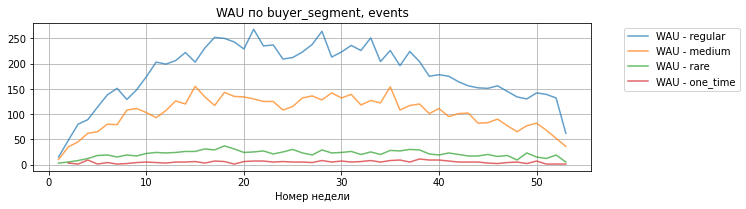

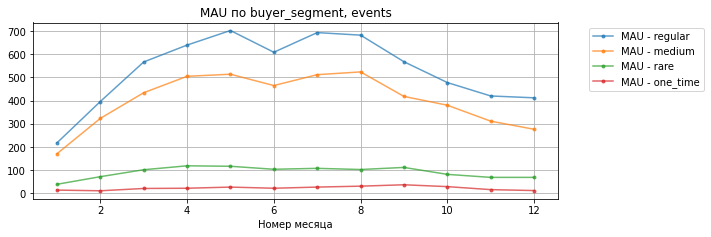

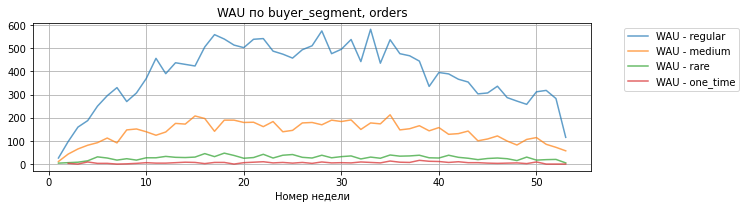

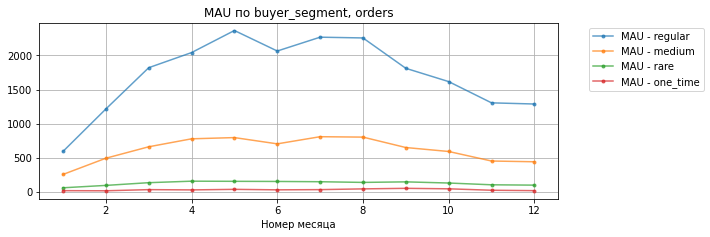

In [27]:
chek_list = ['gender', 'region', 'acq_channel', 'buyer_segment']
u_o_list=['events','orders']

for i in chek_list:
    print(f"\n Анализ по {i}")
    weekly_stats = orders_with_users.groupby(['week_number', i], observed=True).agg(
        events=('user_id', 'nunique'),
        orders=('order_id', 'nunique')
    ).reset_index()
    
    monthly_stats = orders_with_users.groupby(['month_number', i], observed=True).agg(
        events=('user_id', 'nunique'),
        orders=('order_id','nunique')
    ).reset_index()

    for u in u_o_list:
        plt.figure(figsize=(10, 6))
        plt.subplot(2, 1, 1)
        
        for category in weekly_stats[i].unique():
            data = weekly_stats[weekly_stats[i] == category]
            plt.plot(data['week_number'], data[u], label=f'WAU - {category}', alpha=0.7)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.title(f'WAU по {i}, {u}')
        plt.xlabel('Номер недели')
        plt.grid(True)
        plt.figure(figsize=(10, 6))
        plt.subplot(2, 1, 2)
        for category in monthly_stats[i].unique():
            data = monthly_stats[monthly_stats[i] == category]
            plt.plot(data['month_number'], data[u], label=f'MAU - {category}', marker='.', alpha=0.7)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.title(f'MAU по {i}, {u}')
        plt.xlabel('Номер месяца')
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()

<div class="alert alert-info"> 

общая и покупательская активность пользователй в зависимости от пола немного отличается на графиках, но идет в одном тренде, в инюне, июле и августе показатели немного отличаются друг от друга, но дальше идет одинаковй спад.
В регионах общая и покупательская активность пользователй  отличается: другие регионы, МСК и СПБ растут к серидине года, и начинают падать в августе, в остальных регионах нет такого изменения поведения пользователей.
в канадах привлечения выделяются по общей и покупательская активность пользователй Google Ads, его влияние на поведение покупателей видено в разрезе пола и регионов (другие регионы, МСК и СПБ)Ж два пика май и июль и постепенной снижение к декабрю. Есть заметный рост автивности пользователей привлеченных через TicTok, вероятно его рост с июня к декабрю сгляживает резкое падение пользовательской активности.
Поведеине по сегментам покупателя меняется заметнее всего в медиум и регулярных сегментах.


In [28]:
weekly_revenue = orders.groupby('week_number', observed=True)['revenu'].sum()
weekly_users = events.groupby('week_number', observed=True)['user_id'].nunique()
ARPU_weekly = weekly_revenue / weekly_users

monthly_revenue = orders.groupby('month_number')['revenu'].sum()
monthly_users = events.groupby('month_number', observed=True)['user_id'].nunique()
ARPU_monthly = monthly_revenue / monthly_users

daily_revenue = orders.groupby('day_number', observed=True)['revenu'].sum()
daily_users = events.groupby('day_number', observed=True)['user_id'].nunique()
ARPU_daily = daily_revenue / daily_users
day_rolling_avg = ARPU_daily.rolling(30).mean()

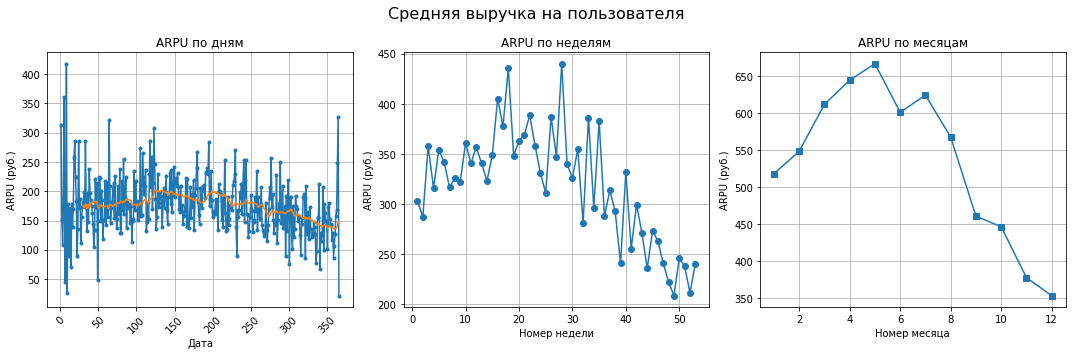

In [29]:
plt.figure(figsize=(15, 5))
plt.suptitle('Cредняя выручка на пользователя', fontsize=16)
plt.subplot(1, 3, 2)
ARPU_weekly.plot(kind='line', marker='o')
plt.title('ARPU по неделям')
plt.xlabel('Номер недели')
plt.ylabel('ARPU (руб.)')
plt.grid(True)

plt.subplot(1, 3, 3)
ARPU_monthly.plot(kind='line', marker='s')
plt.title('ARPU по месяцам')
plt.xlabel('Номер месяца')
plt.ylabel('ARPU (руб.)')
plt.grid(True)

plt.subplot(1, 3, 1)
ARPU_daily.plot(kind='line', marker='.')
day_rolling_avg.plot(kind='line')
plt.title('ARPU по дням')
plt.xlabel('Дата')
plt.ylabel('ARPU (руб.)')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

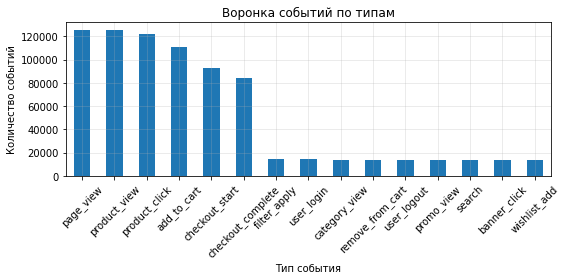

In [30]:
event_counts = events['event_type'].value_counts()
funnel_data = event_counts.sort_values(ascending=False)

plt.figure(figsize=(8, 4))
funnel_data.plot(kind='bar')
plt.title('Воронка событий по типам')
plt.xlabel('Тип события')
plt.ylabel('Количество событий')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [31]:
retention=orders.merge(users[['user_id','cohort_week','cohort_month','acq_channel']],on='user_id', how='left')

In [32]:
retention= retention.dropna(subset=['cohort_week', 'cohort_month']).copy()

In [33]:
retention['order_week'] = pd.to_datetime(retention['order_week']).dt.to_period('W')
retention['cohort_week'] = retention['cohort_week'].dt.to_period('W')
retention['order_month'] = pd.to_datetime(retention['order_month']).dt.to_period('M')
retention['cohort_month'] = retention['cohort_month'].dt.to_period('M')

от всех зарегистрированных пользователей (покажет проблемы активации) и от активных пользователей (покажет проблемы удержания среди вовлеченных)

In [34]:
retention['n_week'] = (retention['order_week'] - retention['cohort_week']).apply(lambda x: x.n)
retention['n_month'] = (retention['order_month'] - retention['cohort_month']).apply(lambda x: x.n)

In [35]:
cohort_data_week=retention.groupby(['cohort_week', 'n_week'])['user_id'].nunique().reset_index()
cohort_table_week = cohort_data_week[cohort_data_week['n_week']<=13].pivot(index='cohort_week', columns='n_week', values='user_id')
cohort_data_month=retention.groupby(['cohort_month', 'n_month'])['user_id'].nunique().reset_index()
cohort_table_month = cohort_data_month[cohort_data_month['n_month']<=13].pivot(index='cohort_month', columns='n_month', values='user_id')


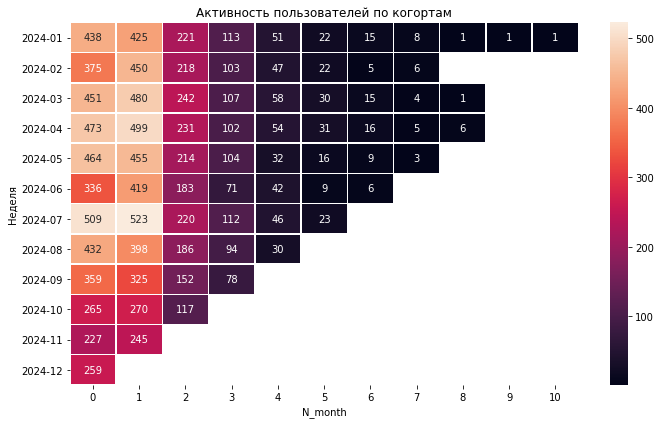

In [36]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.heatmap(cohort_table_month, annot=True, fmt=".0f", linewidth=0.5)
plt.title('Активность пользователей по когортам')
plt.xlabel('N_month')
plt.ylabel('Неделя')
plt.tight_layout()
plt.show()

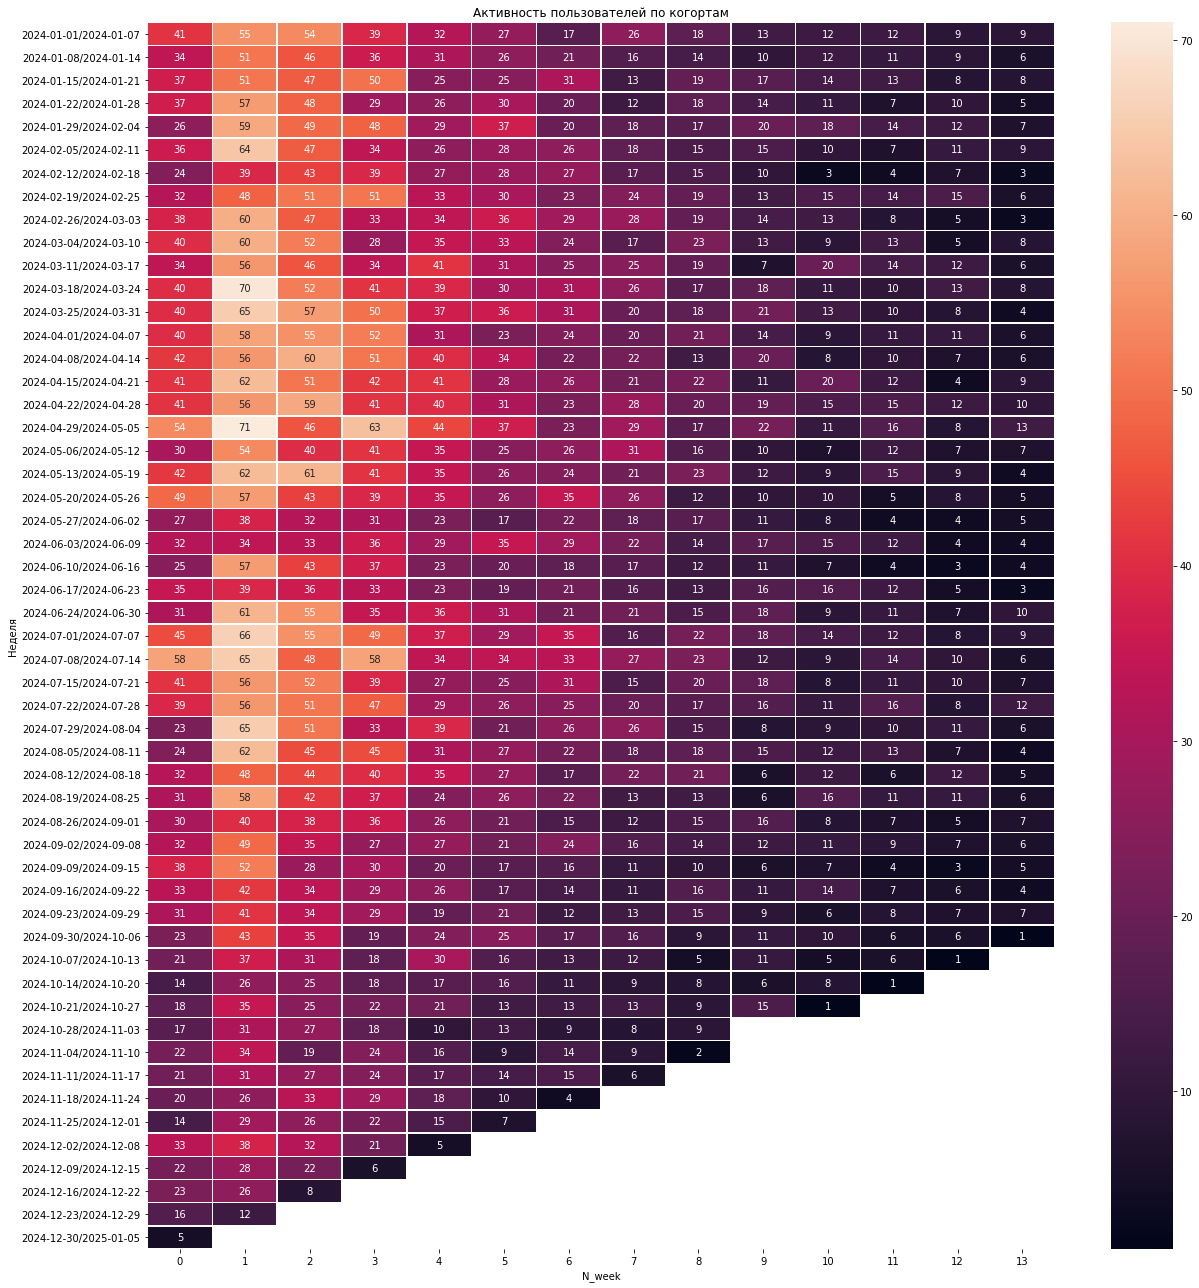

In [37]:
plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(cohort_table_week, annot=True,  linewidth=0.5)
plt.title('Активность пользователей по когортам')
plt.xlabel('N_week')
plt.ylabel('Неделя')
plt.tight_layout()
plt.show()

In [38]:
buying_users = retention.groupby(['cohort_month', 'n_month'])['user_id'].nunique().reset_index()
buying_users.columns = ['cohort_month', 'n_month', 'buying_count']

registered_users = retention.groupby(['cohort_month'])['user_id'].nunique().reset_index()
registered_users.columns = ['cohort_month', 'registered_count']

conversion_analysis = registered_users.merge(buying_users, on=['cohort_month'], how='left')
conversion_analysis['buying_count'] = conversion_analysis['buying_count'].fillna(0)

conversion_analysis['conversion_rate'] = conversion_analysis['buying_count'] / conversion_analysis['registered_count'] 

conversion_analysis_p = conversion_analysis.pivot(index='cohort_month', columns='n_month', values='conversion_rate')

In [39]:
orders_with_users['n_month']=(retention['order_month'] - retention['cohort_month']).apply(lambda x: x.n)

In [40]:
orders_with_users=orders_with_users.dropna(subset=['cohort_month']).copy()

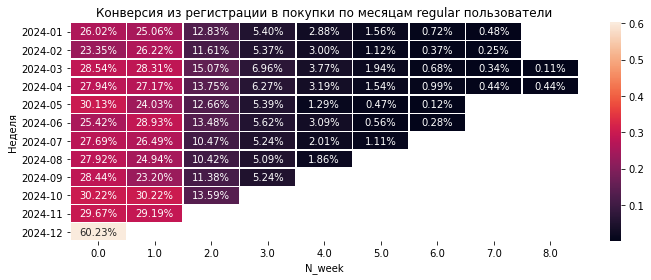

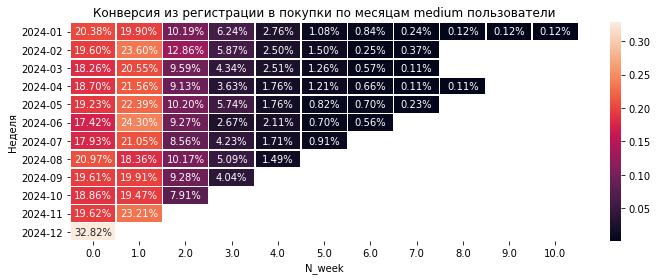

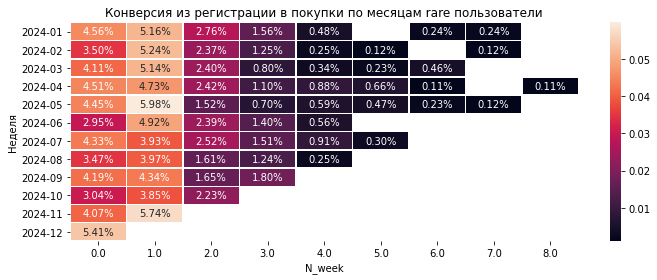

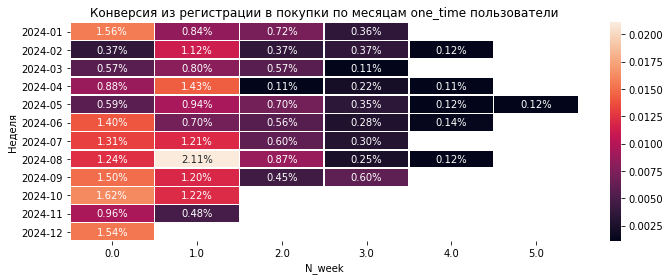

In [41]:
orders_with_users['cohort_month'] = pd.to_datetime(orders_with_users['cohort_month']).dt.to_period('M')

for segment in orders_with_users['buyer_segment'].unique():
    cohort_segment = orders_with_users[orders_with_users['buyer_segment'] == segment].groupby(
        ['cohort_month', 'n_month']
    ).agg(count_user=('user_id','nunique')).reset_index()
    

    conversion_segment = registered_users.merge(
        cohort_segment,
        on='cohort_month',
        how='outer')
    
    conversion_segment['conversion_rate'] = conversion_segment['count_user'] / conversion_segment['registered_count']

    conversion_segment_pivot = conversion_segment.pivot(
        index='cohort_month',
        columns='n_month',
        values='conversion_rate'
    )
    plt.rcParams['figure.figsize'] = (10, 4)
    sns.heatmap(conversion_segment_pivot, fmt=".2%", annot=True,  linewidth=0.5)
    plt.title(f'Конверсия из регистрации в покупки по месяцам {segment} пользователи')
    plt.xlabel('N_week')
    plt.ylabel('Неделя')
    plt.tight_layout()
    plt.show()


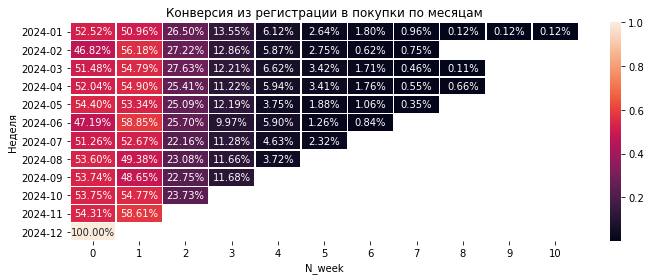

In [42]:
plt.rcParams['figure.figsize'] = (10, 4)
sns.heatmap(conversion_analysis_p, fmt=".2%", annot=True,  linewidth=0.5)
plt.title('Конверсия из регистрации в покупки по месяцам')
plt.xlabel('N_week')
plt.ylabel('Неделя')
plt.tight_layout()
plt.show()

<div class="alert alert-info"> конверсия по типу сегменту клиентов: Regular и Medium показывают наибольшую конверсию сразу после регистрации (≈25–30%), но уже к 2-3 месяцу падают в 2–3 раза и дальше снижаются до единичных процентов, к 10 месяцу доходит 0.1%. У Regular чуть выше старт и более плавное падение, но после 8 месяца клиенты не вовзвращаются.

Rare начинают с 3–5% и держатся на этом уровне первые 1–2 месяца, затем постепенно сходят почти к нулю.

One_time имеют минимальную конверсию (1–2%), заметно ниже остальных сегментов, и быстро уходят в ноль, на 5 месяце конверсия заканчивается.

### Оценка метрик монетизации и юнит-экономики

Выполните анализ монетизации. Определите, сколько зарабатывает продукт и сколько тратит на привлечение.

Важны как агрегированные метрики (ARPU, AOV), так и показатели эффективности (CAC, ROI, Payback Period).

Сформулируйте первые выводы по результатам анализа метрик. Сделайте это в формате записки для заказчика. Изложите все основные результаты так, чтобы прослеживалась связь между мыслями. Не пишите много — заказчик не будет читать записку полностью, а просто просмотрит.

Напишите выводы в конце блока, чтобы заказчик мог быстро ознакомиться с основными результатами.

In [43]:
#общее количество зарегистрировавашихся пользователей по месяцам привлечения

count_users=users.groupby(['cohort_month'], observed=True).agg(count_users=('user_id','nunique')).reset_index()
count_users['cohort_month']=pd.to_datetime(count_users['cohort_month']).dt.to_period('M')

In [44]:
#общеая стоимость рекламы в месяц
campaign_costs_month=campaign_costs.groupby(['spend_month'], observed=True).agg(sum_campaign_costs=('budget','sum')).reset_index()

In [45]:
#расчет САС

CAC_month_channel=count_users.merge(campaign_costs_month, 
                                    right_on  =['spend_month'], 
                                    left_on=['cohort_month'], 
                                    how='outer')

CAC_month_channel=CAC_month_channel.dropna(subset=['cohort_month', 'count_users']).copy()
CAC_month_channel['CAC']=round(CAC_month_channel['sum_campaign_costs']/CAC_month_channel['count_users'],2)

In [46]:
retention_result=retention.groupby(['order_month'], observed=True).agg(count_users=('user_id','nunique'),
                                                    sum_revenu=('revenu','sum'),
                                                    quantity_products=('quantity','sum'),
                                                    quantity_orders=('order_id','nunique')).reset_index()

In [47]:
retention_result=retention_result.merge(CAC_month_channel,
                                        right_on=['cohort_month'], 
                                        left_on=['order_month'],
                                        how='outer'
                                        ,suffixes=('_orders', '_cohort')
                                       )
retention_result['ARPU']=round(retention_result['sum_revenu']/retention_result['count_users_orders'],2)
retention_result['AOV']=round(retention_result['sum_revenu']/retention_result['quantity_orders'],2)

In [48]:
new_users_revenue = retention.groupby('cohort_month')['revenu'].sum()
retention_result = retention_result.merge(new_users_revenue, on='cohort_month', how='left')
retention_result['ROI'] = round((retention_result['revenu'] 
                                 - retention_result['sum_campaign_costs']) 
                                / retention_result['sum_campaign_costs'] * 100, 2)
retention_result['payback_months'] =round(retention_result['CAC']/retention_result['ARPU'], 4)

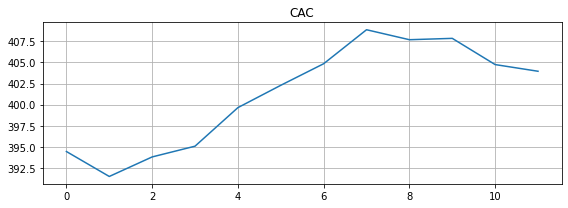

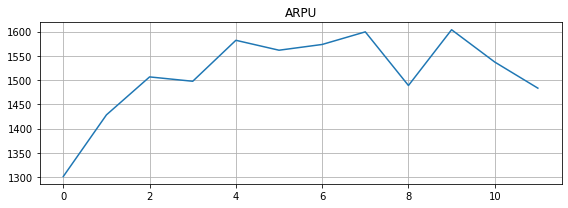

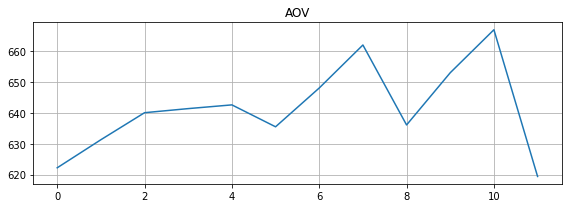

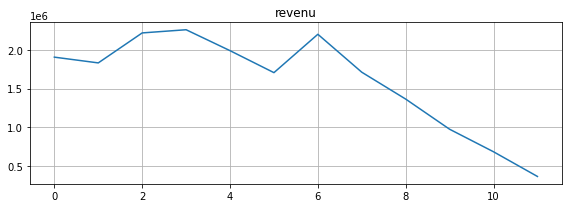

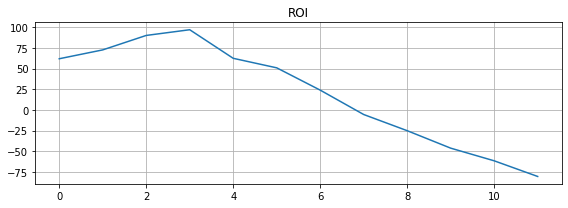

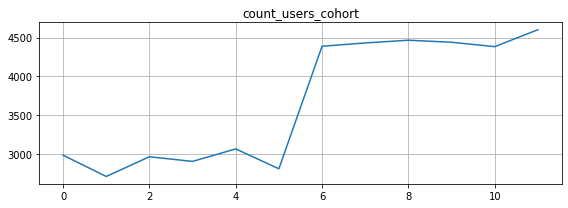

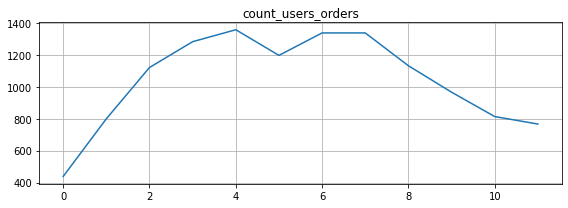

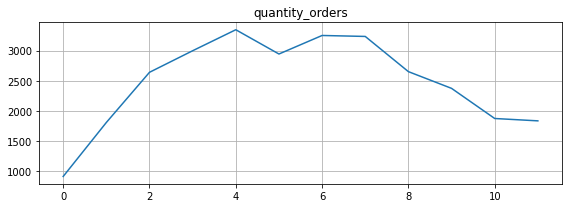

In [49]:
hue_list=['CAC',	'ARPU'	,'AOV'	,'revenu',	'ROI', 'count_users_cohort', 'count_users_orders', 'quantity_orders']

for h in hue_list:
    fig, ax = plt.subplots(figsize=(8, 3))
    retention_result[h].plot(kind='line')
    plt.title(f'{h}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [50]:
#общее количество зарегистрировавашихся пользователей по месяцам привлечения

count_users_channel=users.groupby(['cohort_month', 'acq_channel'], observed=True).agg(count_users=('user_id','nunique')).reset_index()
count_users_channel['cohort_month']=pd.to_datetime(count_users_channel['cohort_month']).dt.to_period('M')

#общеая стоимость рекламы в месяц
campaign_costs_month_channel=campaign_costs.groupby(['spend_month','acq_channel'], observed=True).agg(sum_campaign_costs=('budget','sum')).reset_index()

#расчет САС

CAC_month_channel_channel=count_users_channel.merge(campaign_costs_month_channel, 
                                    right_on  =['spend_month','acq_channel'], 
                                    left_on=['cohort_month','acq_channel'], 
                                    how='outer')

CAC_month_channel_channel=CAC_month_channel_channel.dropna(subset=['cohort_month', 'count_users']).copy()

CAC_month_channel_channel['CAC']=round(CAC_month_channel_channel['sum_campaign_costs']/CAC_month_channel_channel['count_users'],2)



retention_result_channel=retention.groupby(['order_month','acq_channel'], observed=True).agg(
                                                    count_users=('user_id','nunique'),
                                                    sum_revenu=('revenu','sum'),
                                                    quantity_products=('quantity','sum'),
                                                    quantity_orders=('order_id','nunique')).reset_index()
# retention_result_channel['order_month']=pd.to_datetime(retention_result_channel['order_month']).dt.to_period('M')
retention_result_channel=retention_result_channel.merge(CAC_month_channel_channel,
                                        right_on=['cohort_month','acq_channel'], 
                                        left_on=['order_month','acq_channel'],
                                        how='outer'
                                        ,suffixes=('_orders', '_cohort')
                                       )

retention_result_channel['ARPU']=round(retention_result_channel['sum_revenu']/retention_result_channel['count_users_orders'],2)
retention_result_channel['AOV']=round(retention_result_channel['sum_revenu']/retention_result_channel['quantity_orders'],2)

new_users_revenue_channel = retention.groupby(['cohort_month','acq_channel'], observed=True)['revenu'].sum() #сумма ревеню пользователей из когорты за весь год.
retention_result_channel = retention_result_channel.merge(new_users_revenue_channel, on=['cohort_month','acq_channel'], how='left')
retention_result_channel['ROI'] = round((retention_result_channel['revenu'] 
                                 - retention_result_channel['sum_campaign_costs']) 
                                / retention_result_channel['sum_campaign_costs'] * 100, 2)
retention_result_channel['payback_months'] =round(retention_result_channel['CAC']/retention_result_channel['ARPU'], 4)

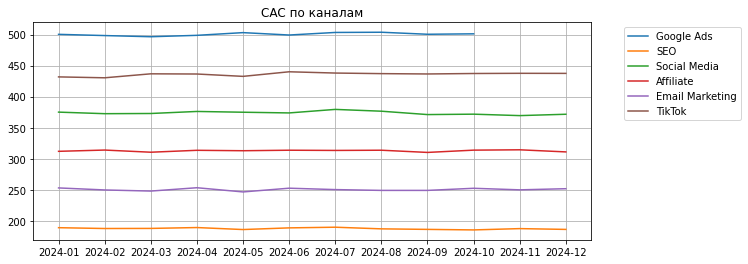

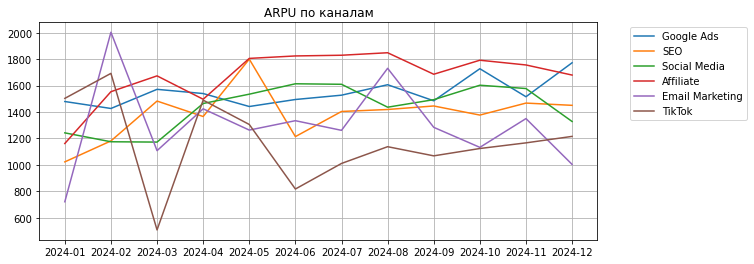

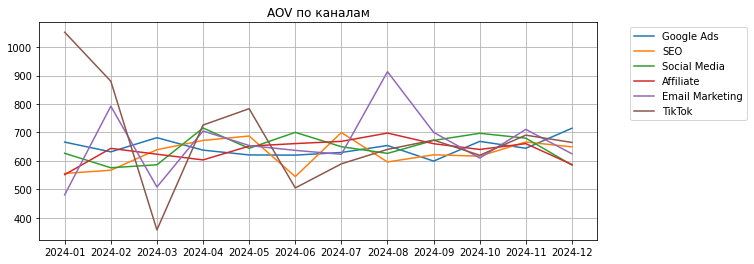

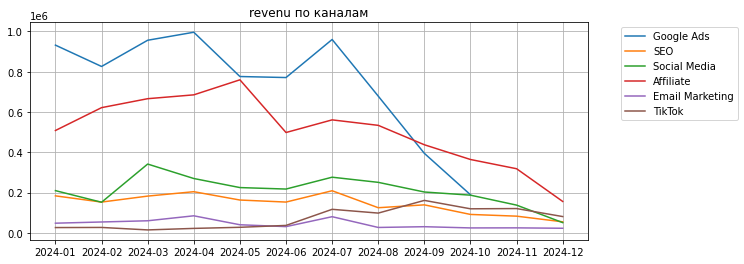

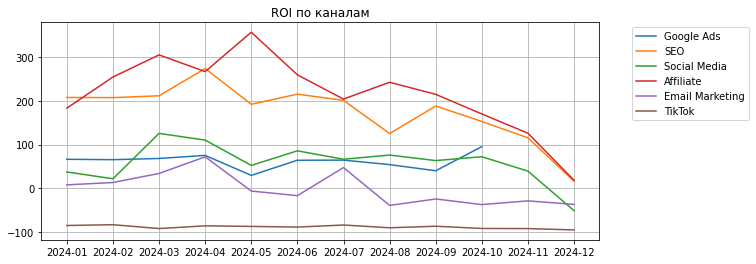

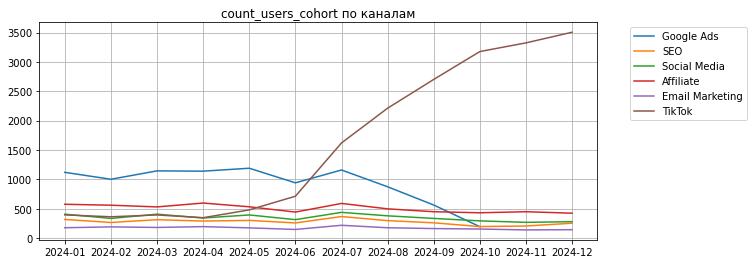

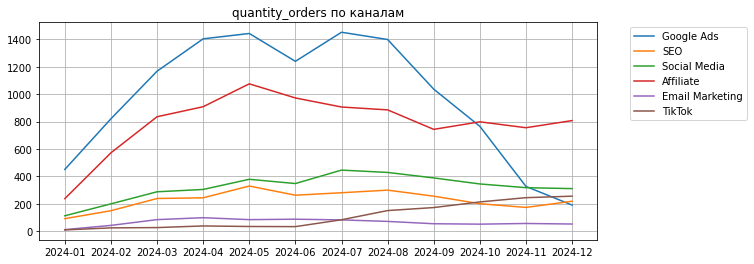

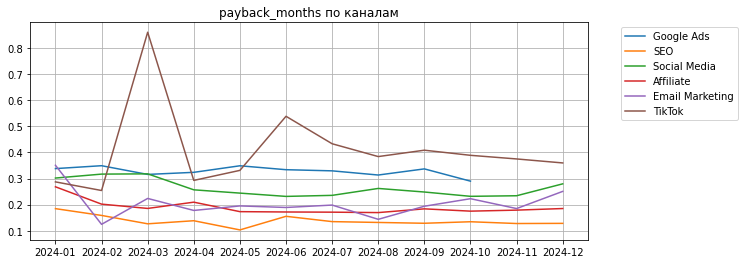

In [51]:
hue_list=['CAC',	'ARPU'	,'AOV'	,'revenu',	'ROI', 'count_users_cohort', 'quantity_orders', 'payback_months']
retention_result_channel['order_month']=retention_result_channel['order_month'].astype('str')
for h in hue_list:
    for i in retention_result_channel['acq_channel'].unique():
        data = retention_result_channel[retention_result_channel['acq_channel'] == i]
        plt.plot(data['order_month'], data[h], label=f'{i}')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f'{h} по каналам')
    plt.grid(True)
    plt.show()    

<div class="alert alert-info"> 
    
**ARPU** все канали демонтрируют сильные колебания в течении года, набольшие изменения у ТИктока,email, SEO. Google Ads и медиа стабильно растут несмотря на колебания.
    
**AOV** Google Ads показывает самый средний и стабильный AOV с небольшими колебаниями.  TikTok и Email демонстрируют сильные колебания за год.
    
**revenu** ниаболее прибыльный канал -  Google Ads и Афилат
    
**ROI** самый выйсокий у двуз каналов афилатная и СЕО, в минусе за весь период надодится ТИКТок.
    
 **count_users_cohort** больше всего пользователей привлек канал ТИкТОк, заметный рост начался в июне. Так же заметное колиество пользоватлей принес канал  Google Ads(за два послежних месяца нет данных).
 
 **quantity_orders** высокий уровень продаж показывает  Google Ads с двумя пиками в течении года и снижеменм количества покупок с августа ,в данных отсутвует информация за два последних месяца(не было затрат или нет данных по этой группе пользователей??), так же заметна эффективнсть Афилатной программы.
 
 **payback_months** самая нестабильная окупаемость в канале TicTok, данные в течении года заметно меняются. остальные каналы достаточно стабильны, держатся на одном уровне.

## Выводы по этапам 2 и 3


Представьте ключевые выводы в текстовом виде здесь или приложите ссылку на документ с презентацией.

Не забудьте предоставить доступ на просмотр и комментирование документа.

<div class="alert alert-info"> 
Январь-июль: Период роста с пиком в мае (1362 покупателя, 2.39M выручка) - CAC стабилен (~394-404), ROI положительный (38-112%), ARPU растет до 1757 руб, AOV стабилен (~685-732).
Август-декабрь: падение - количество покупателей снижается с 1348 до 774, выручка падает с 2.4M до 1.28M, ROI становится отрицательным (-78.93% в декабре), несмотря на рост привлеченных пользователей (с 2985 до 4601), что указывает на резкое ухудшение качества трафика и эффективности конверсии.
    
Последние месяцы года для когорт, ещё нет выручки накопленной за время, поэтому показатель total_price снижается на графике.


**февраль, май,  август и октябрь** показывают выокую покупательсккю активность, необходимо посмотреть какая из кампаний на каких сегментах сработала лучше всего.

Окупаемость рекламных кампаний достаточно быстрая - менее месяца.

Есть проблема конверсии из регистрации в покупку на третий месяц жизни пользователя.
Так же видна проблема потери пользователей на моменте начала оформления заказа и завершением оформления заказа: происходит значительная потеря пользователей.

Продукт показывает положительную динамику по ключевым метрикам, но требует углубленного анализа сегментации для выявления точек роста и оптимизации маркетинговых расходов

## 4. Поиск инсайтов, точек роста и сегментация


После того как вы провели верхнеуровневую оценку данных, самое время переходить от общей картины к точечным наблюдениям. Посмотрите вглубь данных: по каналам,
сегментам пользователей, категориям товаров, регионам, типам устройств. Ищите
закономерности, различия, аномалии.

Цель — сформировать обоснованные гипотезы:

* какие сегменты работают лучше остальных
* какие сегменты работают хуже остальных
* на каких этапах воронки теряются пользователи
* какие группы можно или нужно масштабировать
* куда стоит инвестировать больше внимания или ресурсов

По итогам анализа также:

* сформулируйте в виде аналитической записки выводы
* сформулируйте несколько гипотез, которые помогут развить продукт. Например: «Если предлагать клиентам на iOS персонализированные скидки, то они станут чаще конвертировать в продукт». При формулировании гипотез опишите, на что вы опираетесь при её формировании. Например, на динамику метрики или на взаимосвязь метрик.

Напишите выводы в конце блока, чтобы заказчик мог быстро ознакомиться с основными результатами.
Отправьте работу на проверку ревьюеру. Ревьюер будет проверять корректность выводов и гипотез, а не сам код расчета, поэтому проверьте, что у вас есть выводы по каждому из блоков в предназначенном для этого месте.
После завершения ревью вы получите от ревьюера новые вводные и задачу от бизнеса.


<div class="alert alert-info"> 
    
**Какие сегменты работают лучше остальных**
    
Google Ads - стабильно высокий AOV (~668-732 руб), высокий ARPU, положительный ROI

Аффилатная программа - самый высокий ROI, эффективная монетизация

Email - стабильный AOV, высокий ROI, лояльные пользователи

SEO - высокий ROI, органический трафик

    
**Какие сегменты работают хуже остальных**

TikTok - отрицательный ROI, нестабильный AOV, высокие колебания

соцсети - нестабильные показатели, требует оптимизации таргетинга

**На каких этапах воронки теряются пользователи:**

Регистрация → Покупка: ~70% пользователей не конвертируются в покупателей

Checkout_start → Checkout_complete: значительные потери при оформлении заказа

2-й месяц жизни: резкое падение активности после второго месяца


**Какие группы можно или нужно масштабировать**

Google Ads - при наличии бюджета, стабильно эффективен

Аффилатная программа - максимальный ROI, требует развития

Email-маркетинг - минимальные затраты, высокий ROI

SEO - органический трафик, долгосрочная эффективность


**Проблемы**
 - Нет данных за ноябрь и декабрь в канале Google Ads(нет кампаний в это время? или нет данных, потерялись?)
- Нет времени в таблице события -  дигаргамма Сэнкея наглядно показала бы путь пользователя до покупки.
- Данные о покупках и событиях хранятся в разных таблицах, имют разный формат - нет возможности обьединить и достоверно изучить конверсию в покупку по цепочке событий.
 - В данных о покупках отстусвуют важные данные такие как девайс и тип системы с которой была совершена покупка.

# Подготовка эксперимента и подведение его результатов

Новые вводные (после этапа 4)

Команда продукта рассмотрела твои гипотезы и на основании этого решила влиять на конверсию при помощи финансовых стимуляций. Так как ситуация со снижением выручки срочная и безотлагательная, пока ты продолжал изучать данные, они подключили другого аналитика для подготовки дизайн документа, но само проведение эксперимента на тебе. При формировании выводов допиши рекомендации по итогам теста и, если необходимо, опиши проблемы, присутствующие в эксперименте.

## Новые данные:

```python
pa_diploma_events_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_events_AB.csv')
pa_diploma_orders_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_orders_AB.csv')
pa_diploma_sessions_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_sessions_AB.csv')
pa_diploma_users_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_users_AB.csv')
```

## Результаты сплита лежат в таблице:

```python
pa_diploma_AB_split_users = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_AB_split_users.csv')
```

* user_id – id клиента
* group – группа, в которую попал клиент

## Дизайн эксперимента:

Бонус на первую покупку для пользователей TikTok

## 1. Контекст и цель эксперимента

- **Бизнес-контекст:** Команда продукта запускает эксперимент, направленный на повышение конверсии среди пользователей, привлечённых через канал TikTok. Для стимулирования первой покупки пользователям будет предоставлен бонус на первую покупку.  
- **Цель:** Проверить, влияет ли предоставление бонуса на первую покупку на конверсию и выручку среди пользователей TikTok.  
- **Гипотеза:** Предоставление бонуса на первую покупку новым пользователям, привлеченным через TikTok, приведет к увеличению конверсии в первую покупку

---

## 2. Формат эксперимента

- **Тип эксперимента:** Сплит-роллинг (rolling split)  
- **Канал:** Только пользователи, пришедшие с TikTok  
- **Группы:**  
  - **Контрольная (A):** пользователи TikTok без бонуса  
  - **Тестовая (B):** пользователи TikTok с бонусом на первую покупку  
- **Распределение:** Равномерное распределение новых пользователей TikTok между группами по дате регистрации  
- **Период проведения:** 3 недели (фиксировано)

---

## 3. Ключевые метрики

### Основная метрика

- **Конверсия в первую покупку** — доля пользователей, зарегистрировавшихся с TikTok и совершивших первую покупку  
  - *Цель:* увеличить конверсию с помощью бонуса  
  - *Критерий успеха:* статистически значимый рост конверсии в тестовой группе

### Вспомогательные метрики

- **ARPU** (средняя выручка на пользователя TikTok)  
- **ARPPU** (средняя выручка на покупателя TikTok)  
- **AOV** (средний чек TikTok)

### Барьерная метрика

- **Общая выручка от пользователей TikTok**

---

## 4. Размеры групп и запуск

- **Целевая аудитория:** только пользователи TikTok  
- **Размеры групп:** определяются по фактическому трафику TikTok за период эксперимента  
- **Комментарий:** запуск без предварительного расчёта мощности и MDE из-за срочности задачи


In [52]:
pa_diploma_events_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_events_AB.csv', parse_dates=['event_date'])
pa_diploma_orders_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_orders_AB.csv', parse_dates=['order_date'])
pa_diploma_sessions_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_sessions_AB.csv', parse_dates=['session_start'])
pa_diploma_users_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_users_AB.csv', parse_dates=['registration_date'])
pa_diploma_AB_split_users = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_AB_split_users.csv')

In [53]:
pa_diploma_AB_split_users.groupby('user_id')['group'].nunique().mean()

#пересечений нет.

1.0

In [54]:
data_diging({'pa_diploma_events_AB':pa_diploma_events_AB,
             'pa_diploma_orders_AB ':pa_diploma_orders_AB ,
             'pa_diploma_sessions_AB':pa_diploma_sessions_AB,
             'pa_diploma_users_AB':pa_diploma_users_AB,
            'pa_diploma_AB_split_users':pa_diploma_AB_split_users})



Таблица: pa_diploma_events_AB,  Размер: 831231 строк, 12 столбцов


,column,type,unique_count,non_null_count,missing_val
0,event_id,int64,813509,831231,0.0%
1,session_id,int64,132043,831231,0.0%
2,user_id,int64,23948,831231,0.0%
3,event_date,datetime64[ns],814212,831231,0.0%
4,event_type,object,15,831231,0.0%
5,os,object,4,831231,0.0%
6,device,object,3,831231,0.0%
7,event_index,int64,14,831231,0.0%
8,user_segment,object,4,831231,0.0%
9,product_name,object,200,409054,50.79%




Таблица: pa_diploma_orders_AB ,  Размер: 33280 строк, 10 столбцов


,column,type,unique_count,non_null_count,missing_val
0,order_id,int64,33080,33280,0.0%
1,user_id,int64,9566,33280,0.0%
2,order_date,datetime64[ns],19114,33280,0.0%
3,product_name,object,200,33280,0.0%
4,quantity,int64,3,33280,0.0%
5,unit_price,float64,400,33280,0.0%
6,total_price,float64,1158,33280,0.0%
7,category_name,object,25,33280,0.0%
8,order_week,object,56,33280,0.0%
9,order_month,object,13,33280,0.0%




Таблица: pa_diploma_sessions_AB,  Размер: 127407 строк, 17 столбцов


,column,type,unique_count,non_null_count,missing_val
0,session_id,int64,125181,127407,0.0%
1,user_id,int64,23397,127407,0.0%
2,session_start,datetime64[ns],127149,127407,0.0%
3,os,object,4,127407,0.0%
4,device,object,3,127407,0.0%
5,region,object,9,127407,0.0%
6,browser,object,4,127407,0.0%
7,country,object,1,127407,0.0%
8,entry_path,object,5,127407,0.0%
9,path_start,object,80,127407,0.0%




Таблица: pa_diploma_users_AB,  Размер: 22196 строк, 15 столбцов


,column,type,unique_count,non_null_count,missing_val
0,user_id,int64,22196,22196,0.0%
1,registration_date,datetime64[ns],21545,22196,0.0%
2,os,object,4,22196,0.0%
3,age,int64,53,22196,0.0%
4,device,object,3,22196,0.0%
5,gender,object,2,22196,0.0%
6,region,object,9,22196,0.0%
7,browser,object,4,22196,0.0%
8,country,object,1,22196,0.0%
9,acq_channel,object,1,22196,0.0%




Таблица: pa_diploma_AB_split_users,  Размер: 2968 строк, 2 столбцов


,column,type,unique_count,non_null_count,missing_val
0,user_id,int64,2968,2968,0.0%
1,group,object,2,2968,0.0%


In [55]:
df_ab_users=pa_diploma_AB_split_users.merge(pa_diploma_users_AB,on='user_id', how='inner')
df_ab_events=pa_diploma_AB_split_users.merge(pa_diploma_events_AB,on='user_id', how='inner')
df_ab_orders=pa_diploma_AB_split_users.merge(pa_diploma_orders_AB,on='user_id', how='inner')
df_ab_sessions=pa_diploma_AB_split_users.merge(pa_diploma_sessions_AB,on='user_id', how='inner')

df_ab_orders['revenu']=df_ab_orders['total_price']*0.05

In [56]:
data_diging({'df_ab_users':df_ab_users,'df_ab_events':df_ab_events,'df_ab_orders':df_ab_orders})



Таблица: df_ab_users,  Размер: 2968 строк, 16 столбцов


,column,type,unique_count,non_null_count,missing_val
0,user_id,int64,2968,2968,0.0%
1,group,object,2,2968,0.0%
2,registration_date,datetime64[ns],2852,2968,0.0%
3,os,object,4,2968,0.0%
4,age,int64,53,2968,0.0%
5,device,object,3,2968,0.0%
6,gender,object,2,2968,0.0%
7,region,object,9,2968,0.0%
8,browser,object,4,2968,0.0%
9,country,object,1,2968,0.0%




Таблица: df_ab_events,  Размер: 4349 строк, 13 столбцов


,column,type,unique_count,non_null_count,missing_val
0,user_id,int64,499,4349,0.0%
1,group,object,2,4349,0.0%
2,event_id,int64,4349,4349,0.0%
3,session_id,int64,844,4349,0.0%
4,event_date,datetime64[ns],4345,4349,0.0%
5,event_type,object,15,4349,0.0%
6,os,object,4,4349,0.0%
7,device,object,3,4349,0.0%
8,event_index,int64,10,4349,0.0%
9,user_segment,object,4,4349,0.0%




Таблица: df_ab_orders,  Размер: 255 строк, 12 столбцов


,column,type,unique_count,non_null_count,missing_val
0,user_id,int64,126,255,0.0%
1,group,object,2,255,0.0%
2,order_id,int64,255,255,0.0%
3,order_date,datetime64[ns],136,255,0.0%
4,product_name,object,141,255,0.0%
5,quantity,int64,3,255,0.0%
6,unit_price,float64,141,255,0.0%
7,total_price,float64,200,255,0.0%
8,category_name,object,25,255,0.0%
9,order_week,object,4,255,0.0%


<div class="alert alert-info"> ARPU = Общая выручка / Количество всех пользователей

ARPPU = Общая выручка / Количество платящих пользователей

AOV = Общая выручка / Количество заказов

In [57]:
count_total_user=df_ab_users.groupby('group').agg(count_total_user=('user_id', 'nunique'))

orders_metric=df_ab_orders.groupby('group').agg(count_payers_user=('user_id','nunique'),
                                                sum_revenu=('revenu','sum'),
                                                count_order=('order_id','nunique'))
orders_metric['sum_revenu']=(orders_metric['sum_revenu']).round(2)
orders_metric['ARPPU']=(orders_metric['sum_revenu']/orders_metric['count_payers_user']).round(2)
orders_metric['ARPU']=(orders_metric['sum_revenu']/count_total_user['count_total_user']).round(2)
orders_metric['AOV']=(orders_metric['sum_revenu']/orders_metric['count_order']).round(2)

In [58]:
orders_metric

,count_payers_user,sum_revenu,count_order,ARPPU,ARPU,AOV
group,,,,,,
control,16,18918.64,24,1182.42,12.59,788.28
treatment,110,192279.85,231,1748.00,131.25,832.38


In [59]:
#дата теста
df_ab_users['registration_date'].min(),df_ab_users['registration_date'].max()

(Timestamp('2025-01-01 00:05:00'), Timestamp('2025-01-26 23:41:00'))

In [60]:
CR=df_ab_orders.groupby('group')['user_id'].nunique()/df_ab_users.groupby('group')['user_id'].nunique()

In [61]:
df_metrics = pd.DataFrame({
    "CR": CR,
    "Количество покупателей": df_ab_orders.groupby('group')['user_id'].nunique(),
    "Уникальные сессии": df_ab_sessions.groupby('group')['session_id'].nunique(),
    "Средняя глубина скролла": df_ab_sessions.groupby('group')['scroll_depth'].mean(),
    "Количество событий": df_ab_events.groupby('group')['user_id'].nunique(),
    "Количество пользователи в выборке": df_ab_users.groupby('group')['user_id'].nunique()
})

display(df_metrics)


,CR,Количество покупателей,Уникальные сессии,Средняя глубина скролла,Количество событий,Количество пользователи в выборке
group,,,,,,
control,0.010645,16,431,55.095128,261,1503
treatment,0.075085,110,381,55.963255,238,1465


<div class="alert alert-info"> 

Пользователи распределены равномерно, первдварительно больше покупок совершили в treatment.

<div class="alert alert-info"> 

**Гипотеза**

H₀: Конверсия из регистрации в покупку одинаковая между тестовой и контрольной группой.

H₁: Конверсия из регистрации в покупку отличается между тестовой и контрольной группой.

Хи-квадрат испольщуется так как сравиваем Доля/процент конверсии.

In [62]:
payed_users=df_ab_orders.groupby('group')['user_id'].nunique()
reg_users=df_ab_users.groupby('group')['user_id'].nunique()

table = np.array([
    [payed_users['control'], reg_users['control']-payed_users['control']],
    [payed_users['treatment'], reg_users['treatment']-payed_users['control']]
])

In [73]:
chi2, p, dof, expected = chi2_contingency(table)

if p<0.05:
    print(f'p={p}, разница между control и treatment статистически значима')
else:
    print(f'p={p}, статистической разницы нет')

p=1.548009669888211e-16, разница между control и treatment статистически значима


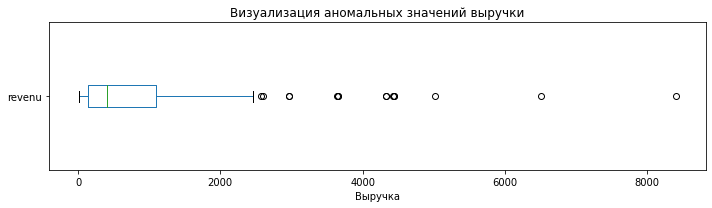

In [64]:
df_ab_orders.boxplot(column='revenu', vert=False, figsize=(10, 3))
plt.title('Визуализация аномальных значений выручки')
plt.xlabel('Выручка')
plt.grid()
plt.tight_layout()
plt.show()

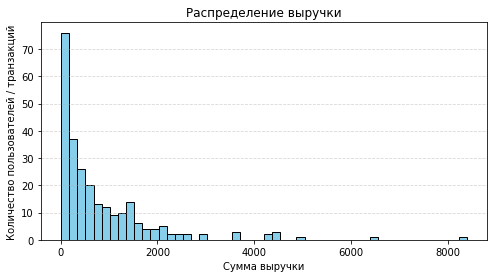

In [65]:
plt.figure(figsize=(8,4))
plt.hist(df_ab_orders['revenu'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Сумма выручки')
plt.ylabel('Количество пользователей / транзакций')
plt.title('Распределение выручки')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

<div class="alert alert-info"> Так как мы сравниваем среднюю выручку, а данные распределены неравномерно по группе в данных с покупками, есть выбросы, группы маленькие по размеру, то используем Mann-Whitney тест

**Гипотеза**

H₀: Средняя выручка одинаковая между тестовой и контрольной группой.

H₁: Средняя выручка между тестовой юольше контрольной группой.

In [66]:
control = df_ab_orders[df_ab_orders['group']=='control']['revenu'].values
test = df_ab_orders[df_ab_orders['group']=='treatment']['revenu'].values

stat, p_value = mannwhitneyu(test, control, alternative='greater')
if p_value < 0.05:
    print(f'p={p_value:.4f}, статистически значимая разница')
else:
    print(f"p={p_value:.4f}, различия не значимы")

p=0.8648, различия не значимы


<div class="alert alert-info"> Пользователи из тестовой группы стали совершать больше покупок, конверсия из регистрации в покупки увеличилась, но средняя выручка не выросла.

In [67]:
ab_test_AOV=df_ab_orders.groupby(['group','user_id']).agg(revenu=('revenu','sum'),order=('order_id','nunique')).reset_index()
ab_test_AOV['AOV_by_user']=ab_test_AOV['revenu']/ab_test_AOV['order']
treatment_AOV=ab_test_AOV[ab_test_AOV['group']=='treatment']['AOV_by_user']
control_AOV=ab_test_AOV[ab_test_AOV['group']=='control']['AOV_by_user']

In [68]:
boot_diffs_AOV= []
n_iterations = 1000
for i in range(n_iterations):
    boot_control = np.random.choice(control_AOV, size=len(control_AOV), replace=True)
    boot_test = np.random.choice(treatment_AOV, size=len(treatment_AOV), replace=True)
    
    diff_AOV = boot_test.mean() - boot_control.mean()
    boot_diffs_AOV.append(diff_AOV)

boot_diffs_AOV = np.array(boot_diffs_AOV)
ci_AOV = np.percentile(boot_diffs_AOV, [2.5, 97.5])
print("95% CI для разницы средних:", ci_AOV)
print("Средняя разница:", boot_diffs_AOV.mean())

95% CI для разницы средних: [-565.9970845   283.95816288]
Средняя разница: -136.3258825807576


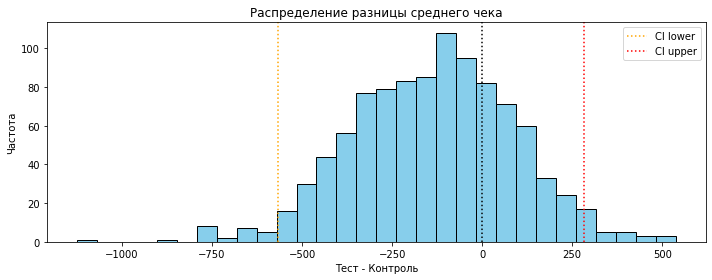

In [69]:
plt.hist(boot_diffs_AOV, bins=30, color='skyblue', edgecolor='black')
plt.axvline(ci_AOV[0], color='orange', linestyle='dotted', label='CI lower')
plt.axvline(ci_AOV[1], color='red', linestyle='dotted', label='CI upper')
plt.axvline(0, color='black', linestyle=':')
plt.title(f'Распределение разницы среднего чека')
plt.xlabel('Тест - Контроль')
plt.ylabel('Частота')
plt.legend()

plt.tight_layout()
plt.show()

In [70]:
ab_test_ARPPU=df_ab_orders.groupby(['group','user_id']).agg(revenu=('revenu','sum')).reset_index()
treatment_ARPPU=ab_test_ARPPU[ab_test_ARPPU['group']=='treatment']['revenu']
control_ARPPU=ab_test_ARPPU[ab_test_ARPPU['group']=='control']['revenu']

In [71]:
boot_diffs_ARPPU= []
n_iterations = 1000
for i in range(n_iterations):
    boot_control = np.random.choice(control_ARPPU, size=len(control_ARPPU), replace=True)
    boot_test = np.random.choice(treatment_ARPPU, size=len(treatment_ARPPU), replace=True)
    
    diff_AOV = boot_test.mean() - boot_control.mean()
    boot_diffs_ARPPU.append(diff_AOV)

boot_diffs_ARPPU = np.array(boot_diffs_ARPPU)
ci_AOV = np.percentile(boot_diffs_ARPPU, [2.5, 97.5])
print("95% CI для разницы средних:", ci_AOV)
print("Средняя разница:", boot_diffs_ARPPU.mean())

95% CI для разницы средних: [  29.08859548 1069.58226047]
Средняя разница: 577.7002138386364


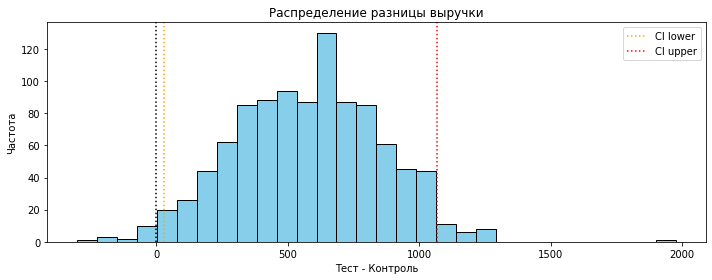

In [72]:
plt.hist(boot_diffs_ARPPU, bins=30, color='skyblue', edgecolor='black')
plt.axvline(ci_AOV[0], color='orange', linestyle='dotted', label='CI lower')
plt.axvline(ci_AOV[1], color='red', linestyle='dotted', label='CI upper')
plt.axvline(0, color='black', linestyle=':')
plt.title(f'Распределение разницы выручки')
plt.xlabel('Тест - Контроль')
plt.ylabel('Частота')
plt.legend()

plt.tight_layout()
plt.show()

<div class="alert alert-info"> 
    
В результате анализа AOV и ARPPU пользвоателя по групам с помощью бутстрапа:

Несмотря на то, что среднее **AOV** у тестовой группы ниже, результат неустойчив — разница может быть как отрицательной, так и положительной, поскольку распределение включает в себя 0.
Следовательно, гипотеза о различии AOV между группами не подтверждается.

**ARPPU**
Доверительный интервал положительный (не содержит 0). Это значит, что платящие пользователи в тесте приносят статистически значимо больше выручки, чем в контроле.


## Выводы по этапу 5

Представьте ключевые выводы в текстовом виде здесь или приложите ссылку на документ с презентацией.

Не забудьте предоставить доступ на просмотр и комментирование документа.

<div class="alert alert-info"> 

Проведенный тест на пользователях дал увеличение количества покупок пользователями из тестовой группы, что в сумме приводит к росту выручки, но сумма выручки с пользователя статистически не выросла.

<div class="alert alert-info"> 

Возможные объяснения почему AOV снизился, но ARPU вырос:
    
- Несколько крупных сделок поддерживают ARPPU
- Возможны повторные покупки
    
   
Тест успешен, но требует поэтапного внедрения с мониторингом долгосрочных эффектов и unit-экономики.
    
Риски:
- Привыкание к бонусам (снижение органической конверсии)
- Каннибализация (пользователи, которые купили бы без бонуса)
- Мошенничество (мультиаккаунты для получения бонусов)
    
Бонус также не решает фундаментальную проблему — общее снижение числа регистраций и падение качества TikTok-трафика. 
Если бы у нас были данные, то было бы интересно посчитать прямые затраты на бонусы: 
    
- Рассчитать ROI с учетом стоимости бонусов
- Оценить LTV с учетом повторных покупок
- Определить оптимальный размер бонуса